## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")

combined_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_regimen_mean = combined_mouse_data.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
combined_regimen_median = combined_mouse_data.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
combined_regimen_variance = combined_mouse_data.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
combined_regimen_std_dev = combined_mouse_data.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
combined_regimen_sem = combined_mouse_data.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

regimen_df = pd.DataFrame ({
    
    'Tumor Volume Mean': combined_regimen_mean,
    'Tumor Volume Median': combined_regimen_median,
    'Tumor Volume Variance': combined_regimen_variance,
    'Tumor Volume Std Deviation': combined_regimen_std_dev,
    'Tumor Volume Std Error of Mean': combined_regimen_sem
})

regimen_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

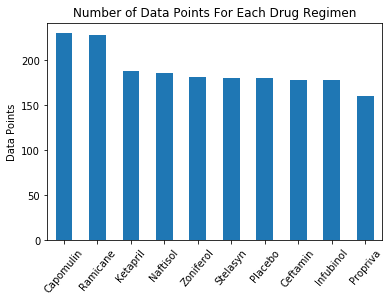

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
reg_count = combined_mouse_data["Drug Regimen"].value_counts()
#reg_count = reg_count.sort_values(ascending=False)
ax = reg_count.plot (kind = 'bar',rot = 50, title = 'Number of Data Points For Each Drug Regimen')

ax.set(ylabel="Data Points")
plt.show()

reg_count


In [6]:
names = reg_count.index.values
names
values = reg_count.values
values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 161], dtype=int64)

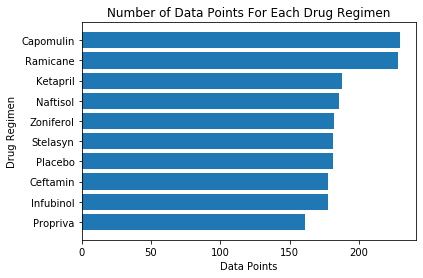

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.barh(names , values)
plt.gca().invert_yaxis()
#plt.title('Number of Data Points For Each Drug Regimen')
plt.xlabel('Data Points')
plt.ylabel('Drug Regimen')
plt.title('Number of Data Points For Each Drug Regimen')
#plt.ylabel('Data Points')
plt.show()

## Pie plots

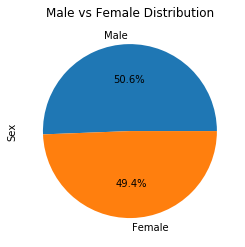

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distr = combined_mouse_data["Sex"].value_counts()
gender_distr.plot(kind ='pie',autopct='%1.1f%%')
plt.title('Male vs Female Distribution')
plt.show()

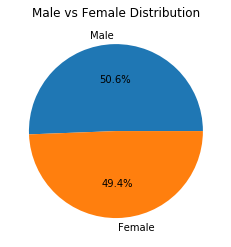

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distr, labels = combined_mouse_data["Sex"].unique(),autopct='%1.1f%%')
plt.title('Male vs Female Distribution')
plt.show()

## Quartiles, outliers and boxplots

In [9]:
#Creating seperate data frame for each, promising drug regimen
cap_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] =="Capomulin",:]
ram_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] =="Ramicane",:]
cefta_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] =="Ceftamin",:]
infu_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] =="Infubinol",:]

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin IQR and Outliers

cap_time = cap_df.groupby(["Mouse ID"]).max()["Timepoint"]
cap_time_df = pd.DataFrame(cap_time)
cap_vol = pd.merge(cap_time_df,combined_mouse_data,on=("Mouse ID","Timepoint"),how = 'left')
cap_tumor_vol = cap_vol["Tumor Volume (mm3)"]

cap_quart = cap_tumor_vol.quantile([.25,.5,.75])
cap_lower_q = cap_quart[.25]
cap_upper_q = cap_quart[.75]
cap_iq = cap_upper_q - cap_lower_q

cap_lower_bound = cap_lower_q - (1.5 * cap_iq)

cap_upper_bound = cap_upper_q + (1.5 * cap_iq)

print(f'The IQR is {cap_iq:.2f}')
print(f'Values below {cap_lower_bound:.2f} could be outliers')
print(f'Values above {cap_upper_bound:.2f} could be outliers')

cap_outliers =[]

for r in cap_tumor_vol:
    if r > cap_upper_bound or r < cap_lower_bound:
        cap_outliers.append(r)

if len(cap_outliers)== 0:
    print('There were no outliers')
else:
    print('The following are outliers:')
    print(*cap_outliers, sep ='\n')


The IQR is 7.78
Values below 20.70 could be outliers
Values above 51.83 could be outliers
There were no outliers


In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#Ramicane IQR and Outliers

ram_time = ram_df.groupby(["Mouse ID"]).max()["Timepoint"]
ram_time_df = pd.DataFrame(ram_time)
ram_vol = pd.merge(ram_time_df,combined_mouse_data,on=("Mouse ID","Timepoint"),how = 'left')
ram_tumor_vol = ram_vol["Tumor Volume (mm3)"]

ram_quart = ram_tumor_vol.quantile([.25,.5,.75])
ram_lower_q = ram_quart[.25]
ram_upper_q = ram_quart[.75]
ram_iq = ram_upper_q - ram_lower_q

ram_lower_bound = ram_lower_q - (1.5 * ram_iq)

ram_upper_bound = ram_upper_q + (1.5 * ram_iq)

print(f'The IQR is {ram_iq:.2f}')
print(f'Values below {ram_lower_bound:.2f} could be outliers')
print(f'Values above {ram_upper_bound:.2f} could be outliers')


ram_outliers =[]

for r in ram_tumor_vol:
    if r > ram_upper_bound or r < ram_lower_bound:
        ram_outliers.append(r)

if len(ram_outliers)== 0:
    print('There were no outliers')
else:
    print('The following are outliers:')
    print(*ram_outliers, sep ='\n')



The IQR is 9.10
Values below 17.91 could be outliers
Values above 54.31 could be outliers
There were no outliers


In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#Ceftamin IQR and Outliers

cefta_time = cefta_df.groupby(["Mouse ID"]).max()["Timepoint"]
cefta_time_df = pd.DataFrame(cefta_time)
cefta_vol = pd.merge(cefta_time_df,combined_mouse_data,on=("Mouse ID","Timepoint"),how = 'left')
cefta_tumor_vol = cefta_vol["Tumor Volume (mm3)"]

cefta_quart = cefta_tumor_vol.quantile([.25,.5,.75])
cefta_lower_q = cefta_quart[.25]
cefta_upper_q = cefta_quart[.75]
cefta_iq = cefta_upper_q - cefta_lower_q

cefta_lower_bound = cefta_lower_q - (1.5 * cefta_iq)

cefta_upper_bound = cefta_upper_q + (1.5 * cefta_iq)

print(f'The IQR is {cefta_iq:.2f}')
print(f'Values below {cefta_lower_bound:.2f} could be outliers')
print(f'Values above {cefta_upper_bound:.2f} could be outliers')


cefta_outliers =[]

for r in cefta_tumor_vol:
    if r > cefta_upper_bound or r < cefta_lower_bound:
        cefta_outliers.append(r)

if len(cefta_outliers)== 0:
    print('There were no outliers')
else:
    print('The following are outliers:')
    print(*cefta_outliers, sep ='\n')

The IQR is 15.58
Values below 25.36 could be outliers
Values above 87.67 could be outliers
There were no outliers


In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#Infubinol IQR and Outliers

infu_time = infu_df.groupby(["Mouse ID"]).max()["Timepoint"]
infu_time_df = pd.DataFrame(infu_time)
infu_vol = pd.merge(infu_time_df,combined_mouse_data,on=("Mouse ID","Timepoint"),how = 'left')
infu_tumor_vol = infu_vol["Tumor Volume (mm3)"]

infu_quart = infu_tumor_vol.quantile([.25,.5,.75])
infu_lower_q = infu_quart[.25]
infu_upper_q = infu_quart[.75]
infu_iq = infu_upper_q - infu_lower_q

infu_lower_bound = infu_lower_q - (1.5 * infu_iq)

infu_upper_bound = infu_upper_q + (1.5 * infu_iq)

print(f'The IQR is {infu_iq:.2f}')
print(f'Values below {infu_lower_bound:.2f} could be outliers')
print(f'Values above {infu_upper_bound:.2f} could be outliers')


infu_outliers =[]

for r in infu_tumor_vol:
    if r > infu_upper_bound or r < infu_lower_bound:
        infu_outliers.append(r)

if len(infu_outliers)== 0:
    print('There were no outliers')
else:
    print('The following are outliers:')
    print(*infu_outliers, sep ='\n')

The IQR is 11.48
Values below 36.83 could be outliers
Values above 82.74 could be outliers
The following are outliers:
36.321345799999996


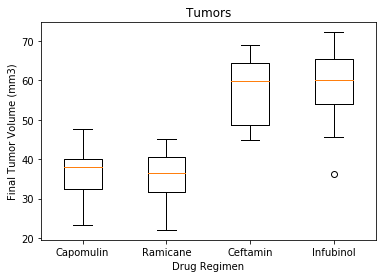

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_drug = [cap_tumor_vol, ram_tumor_vol, cefta_tumor_vol,infu_tumor_vol]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol_drug, labels=["Capomulin","Ramicane","Ceftamin","Infubinol"])

#plt.savefig('boxplot')
plt.show()

## Line and scatter plots

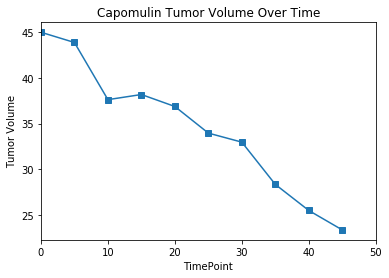

In [15]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time = cap_df["Timepoint"].unique()

cap_df
cap_tum = cap_df.loc[cap_df["Mouse ID"] =="s185",:]
s185_vol = cap_tum["Tumor Volume (mm3)"]

s185_df = pd.DataFrame({
    "TimePoint": time,
    "Tumor Volume": s185_vol
})

s185_df
s185_df.plot.line(x='TimePoint', y='Tumor Volume',marker ='s', legend = False)

plt.ylabel("Tumor Volume")
plt.title("Capomulin Tumor Volume Over Time")
plt.xlim(0,50)
#s185_plt = plt.plot(s185_vol,time, marker ='o', color='blue')

plt.show()

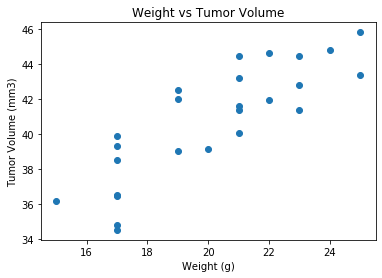

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = cap_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
cap_reg_vol = cap_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]


plt.scatter(mouse_weight, cap_reg_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume")
plt.show()

In [46]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f'The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(mouse_weight,cap_reg_vol)[0],2)}')

The correlation coefficient between malic acid and flavanoids is 0.84


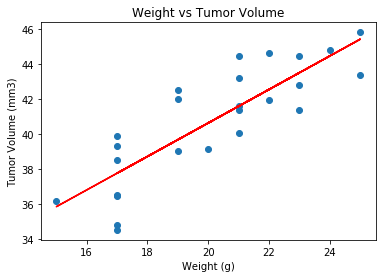

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight,cap_reg_vol)
regress_values = slope*mouse_weight + intercept

plt.scatter(mouse_weight, cap_reg_vol)
plt.plot(mouse_weight,regress_values,'r')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume")
plt.show()